In [1]:
import gymnasium as gym
import trading_gym as tg

## Initialize the environment

In [2]:
env = gym.make("stocks-v0")

In [3]:
env.df.head()

,Open,High,Low,Close,Volume,SMA,EMA,RSI
Date,,,,,,,,
2021-04-26,1908.098440,1949.838094,1899.651129,1925.837769,9620785,1954.091644,1946.221296,47.469058
2021-04-27,1927.974540,1984.819926,1926.235388,1976.322998,9226547,1951.177319,1949.088125,63.908649
2021-04-28,1985.465952,1995.553059,1967.875717,1984.919434,7902002,1951.468011,1952.500631,65.999227
2021-04-29,2010.360766,2031.826851,1994.857490,2011.503662,8035915,1952.928906,1958.119967,71.823081
2021-04-30,1996.049937,2023.379473,1975.229848,1982.136719,9150974,1951.199689,1960.407277,58.952297


## Reset the environment before proceeding

In [4]:
env.reset()

({'balance': array([10000.]),
  'equity': array([0.]),
  'quantity': array([0], dtype=uint32),
  'features': array([1.90809844e+03, 1.94983809e+03, 1.89965113e+03, 1.92583777e+03,
         9.62078500e+06, 1.95409164e+03, 1.94622130e+03, 4.74690584e+01])},
 {'total_reward': 0.0})

## Randomly take steps through the environment

In [5]:
import numpy as np
done = False
while not done:
    action = np.random.choice(env.legal_actions())
    _, _, terminated, truncated, _ = env.step(action)
    done = terminated or truncated

04/04/23 10:36:36 trading_gym.envs.stock[317] - INFO: Plot drawn for episode 1
04/04/23 10:36:36 trading_gym.envs.stock[317] - INFO: Plot drawn for episode 1


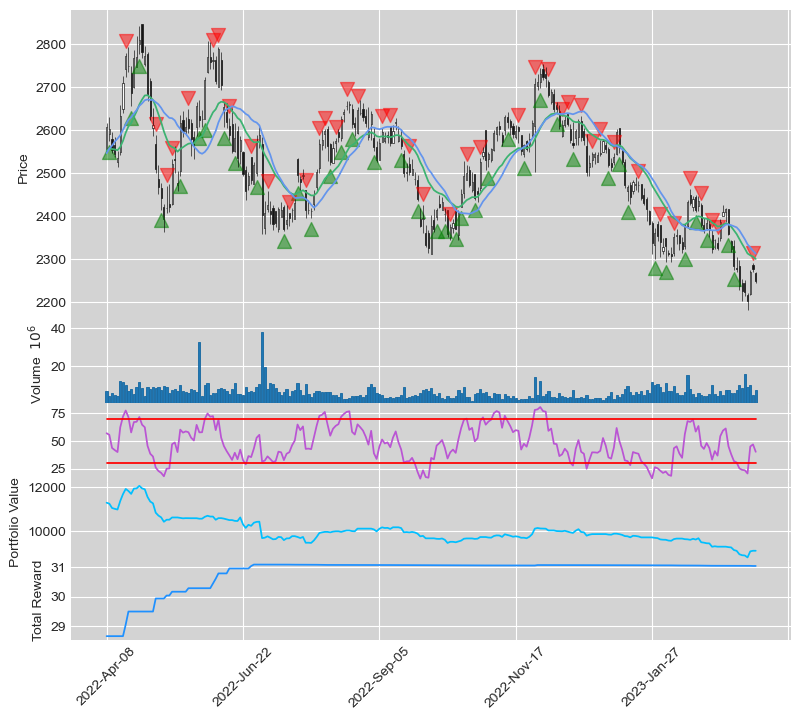

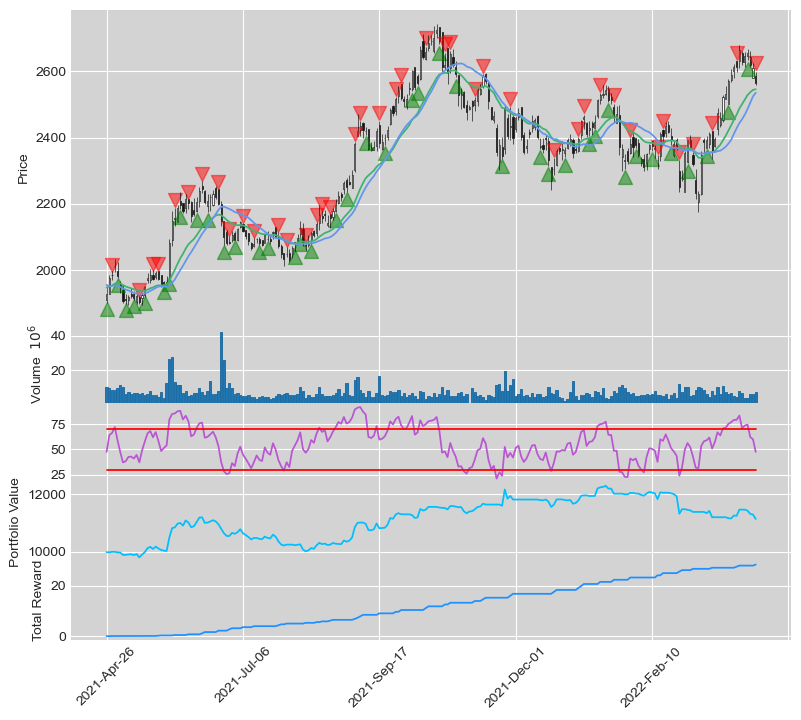

In [6]:
%matplotlib inline
env.render()